## 케글 타이타닉 연습

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

import scipy

# 결측치 시각화 패키지
import missingno as msno

import re
import os

plt.style.use("seaborn")
sns.set(font_scale = 2.5)

warnings.filterwarnings("ignore")
%matplotlib inline

In [235]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [236]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [237]:
# : > 은 padding을 왼쪽에, 문자열을 오른쪽에 정렬하는 방법
# : <(생략) 은 padding을 오른쪽에, 문자열을 왼쪽에 정렬하는 방법
for col in train.columns:
    percent = train[col].isnull().sum() / train.shape[0]
    percent = round(percent * 100, 2)
    msg = f'columns : {col : >10}\t Percent of NaN value : {percent}%'
    print(msg)

columns : PassengerId	 Percent of NaN value : 0.0%
columns :   Survived	 Percent of NaN value : 0.0%
columns :     Pclass	 Percent of NaN value : 0.0%
columns :       Name	 Percent of NaN value : 0.0%
columns :        Sex	 Percent of NaN value : 0.0%
columns :        Age	 Percent of NaN value : 19.87%
columns :      SibSp	 Percent of NaN value : 0.0%
columns :      Parch	 Percent of NaN value : 0.0%
columns :     Ticket	 Percent of NaN value : 0.0%
columns :       Fare	 Percent of NaN value : 0.0%
columns :      Cabin	 Percent of NaN value : 77.1%
columns :   Embarked	 Percent of NaN value : 0.22%


In [238]:
# : > 은 padding을 왼쪽에, 문자열을 오른쪽에 정렬하는 방법
# : <(생략) 은 padding을 오른쪽에, 문자열을 왼쪽에 정렬하는 방법
for col in test.columns:
    percent = test[col].isnull().sum() / test.shape[0]
    percent = round(percent * 100, 2)
    msg = f'columns : {col : >10}\t Percent of NaN value : {percent}%'
    print(msg)

columns : PassengerId	 Percent of NaN value : 0.0%
columns :     Pclass	 Percent of NaN value : 0.0%
columns :       Name	 Percent of NaN value : 0.0%
columns :        Sex	 Percent of NaN value : 0.0%
columns :        Age	 Percent of NaN value : 20.57%
columns :      SibSp	 Percent of NaN value : 0.0%
columns :      Parch	 Percent of NaN value : 0.0%
columns :     Ticket	 Percent of NaN value : 0.0%
columns :       Fare	 Percent of NaN value : 0.24%
columns :      Cabin	 Percent of NaN value : 78.23%
columns :   Embarked	 Percent of NaN value : 0.0%


<AxesSubplot:>

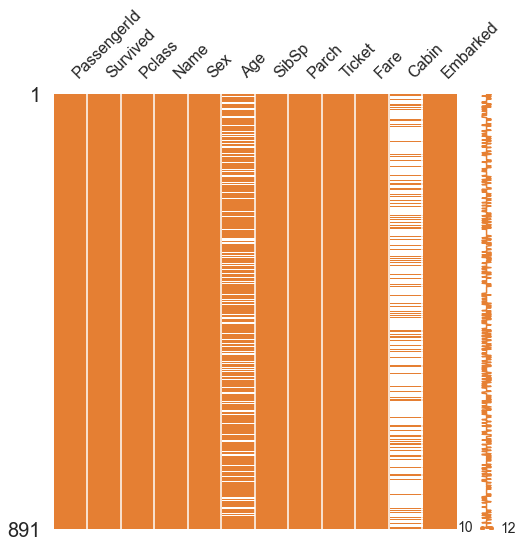

In [239]:
msno.matrix(df = train.iloc[:, :], figsize = (8, 8), color=( 0.9, 0.5, 0.2))

<AxesSubplot:>

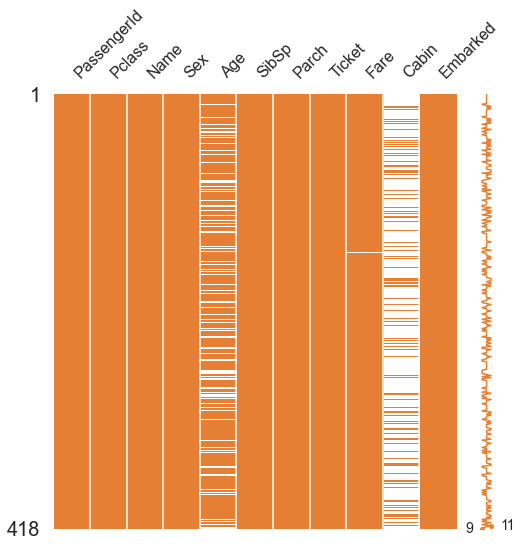

In [240]:
msno.matrix(df = test.iloc[:, :], figsize = (8, 8), color=( 0.9, 0.5, 0.2))

### 1.2 Target label 확인

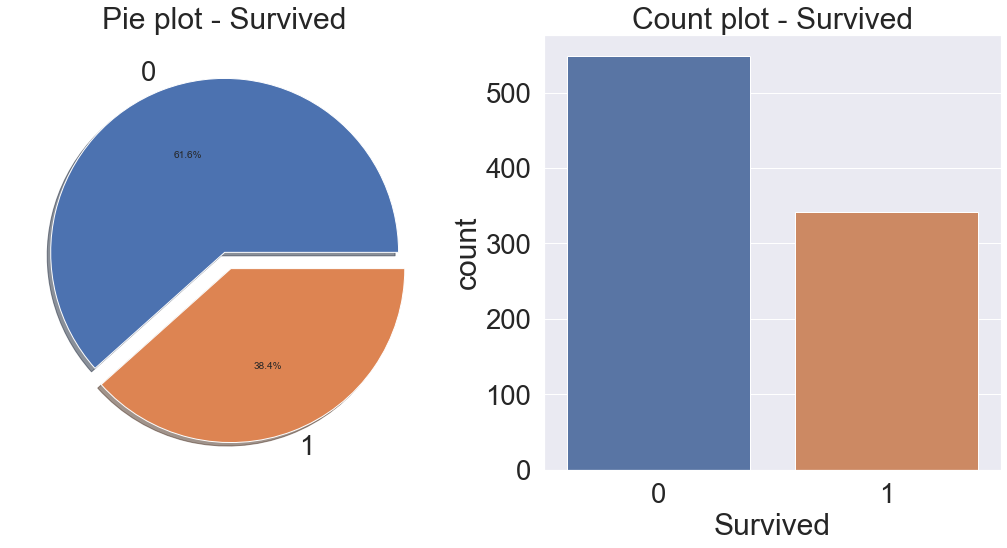

In [241]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                          autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")
sns.countplot("Survived", data = train, ax = ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

## 2. EDA
### 2.1 Pclass

In [242]:
# as_index = False : groupby의 집단을 index로 사용 안하고 column화 할때 사용
train[["Pclass", "Survived"]].groupby("Pclass", as_index = False).agg(["count", "sum"])

Survived     
          count  sum
Pclass              
1           216  136
2           184   87
3           491  119

In [243]:
# pd.crosstab(index, value) : index를 기준으로 value의 빈도를 구할때 사용
# margins = True : 교차표의 행 합, 열 합 추가
# normalize = True : 구성비율로 교차표 
pd.crosstab(train["Pclass"], train["Survived"], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.02, 'Pclass : Survived Vs Dead')

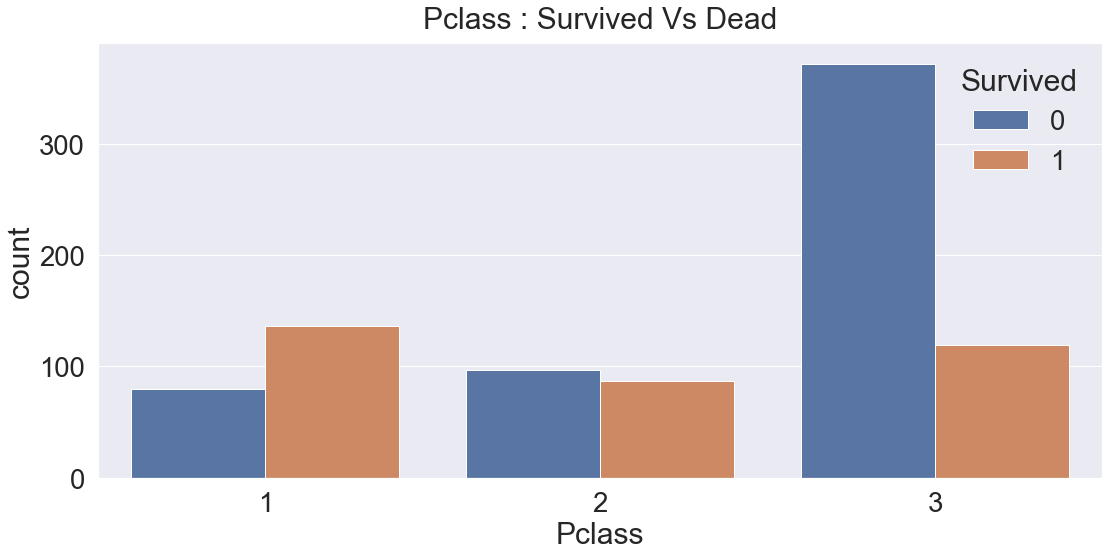

In [244]:
fig = plt.subplots(figsize = (18, 8))
sns.countplot("Pclass", hue = "Survived", data = train)
plt.title("Pclass : Survived Vs Dead", y = 1.02)

### 2.2 Sex

Text(0.5, 1.0, 'Sex : Survived vs Dead')

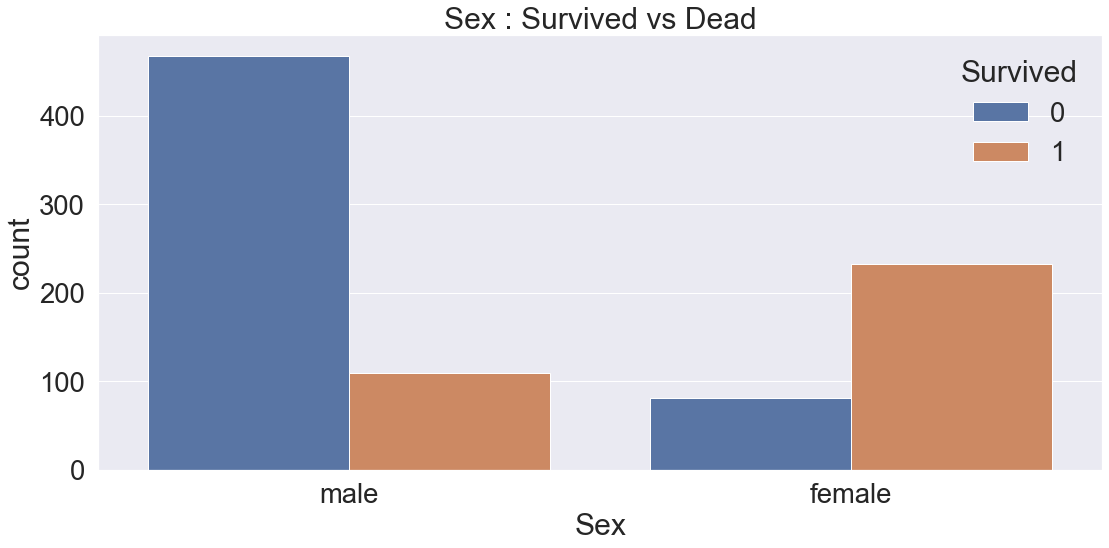

In [245]:
fig = plt.subplots(figsize = (18, 8))
sns.countplot("Sex", hue = 'Survived', data = train)
plt.title("Sex : Survived vs Dead")

In [246]:
pd.crosstab(train["Sex"], train["Survived"], margins = True).style.background_gradient(cmap = "summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sx and Pclass

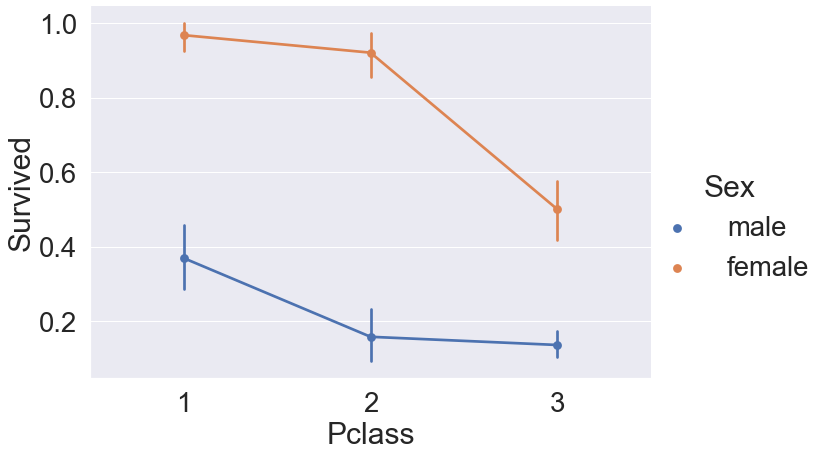

In [247]:
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train,
              size = 6, aspect = 1.5)

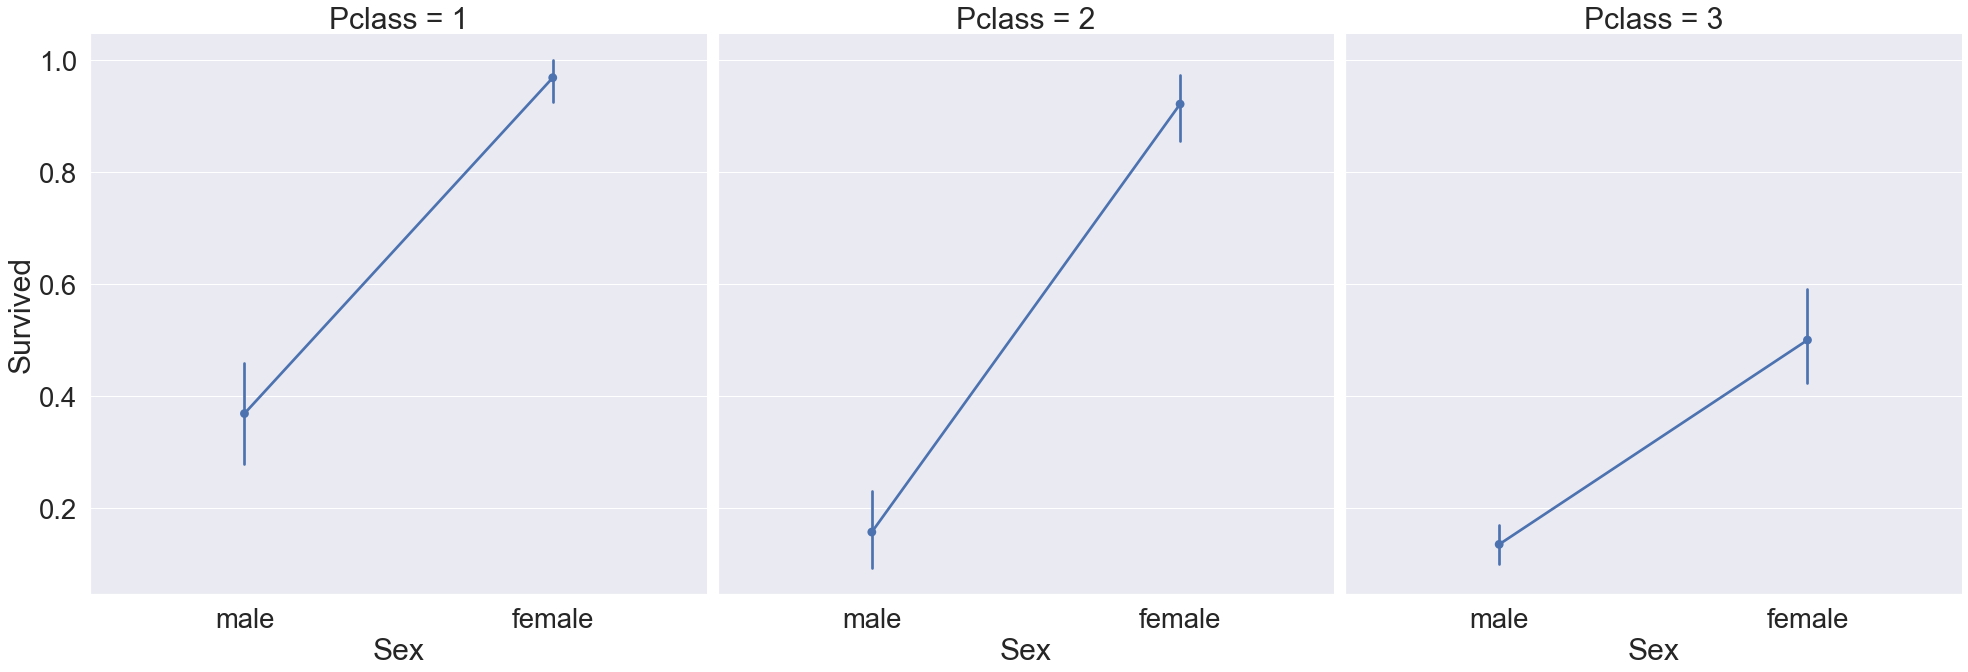

In [248]:
sns.factorplot("Sex", "Survived", col = "Pclass", data = train, satureation = .5,
              size = 9, aspect = 1)

### 2.4 Age

In [249]:
print(f"제일 나이 많은 탑승객 : {train.Age.max()}Years")
print(f"제일 어린 탐승객 : {train.Age.min()}Years")
print(f"탑승객 평균 나이 : {round(train.Age.mean(), 1)}Years")

제일 나이 많은 탑승객 : 80.0Years
제일 어린 탐승객 : 0.42Years
탑승객 평균 나이 : 29.7Years


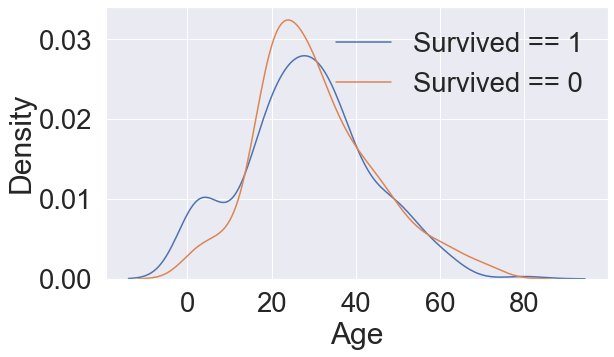

In [250]:
# 생존에 따른 Age의 histogram
fig = plt.subplots(figsize = (9,5))
sns.kdeplot(train[train["Survived"] == 1]["Age"])
sns.kdeplot(train[train["Survived"] == 0]["Age"])
plt.legend(["Survived == 1", "Survived == 0"])

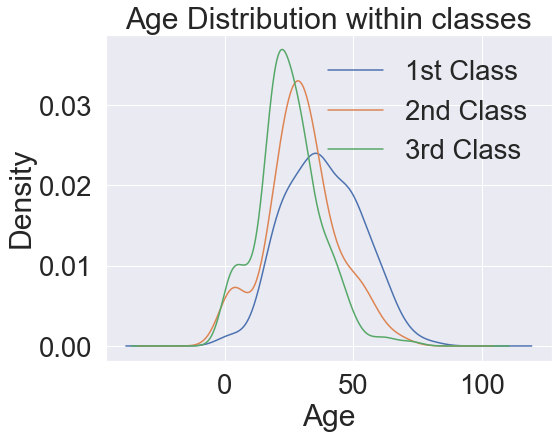

In [251]:
# Age distribution withing classes
plt.figure(figsize = (8,6))
train["Age"][train["Pclass"] == 1].plot(kind = "kde")
train["Age"][train["Pclass"] ==2].plot(kind = "kde")
train["Age"][train["Pclass"] ==3].plot(kind = "kde")

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

Text(0.5, 0, 'Range of Age (0 ~ x)')

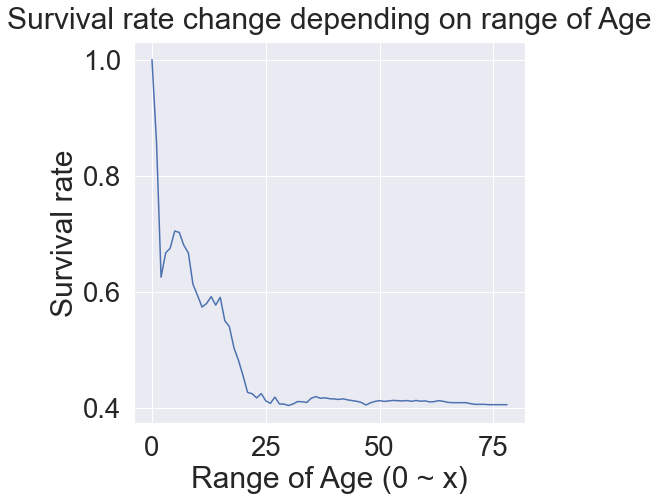

In [252]:
# 상대도수(relative frequency) : 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지
# 누적상대도수(cumulative relative frequency) : 해당 계급까지의 상대도수의 합

cummulate_survival_ratio = []
cummulate_survival = []

for i in range(1, 80):
    data = train[train["Age"] < i]["Survived"].sum() / len(train[train["Age"] < i]["Survived"])
    cummulate_survival_ratio.append(data)
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age (0 ~ x)")

### 2.5 Pclass, Sex, Age

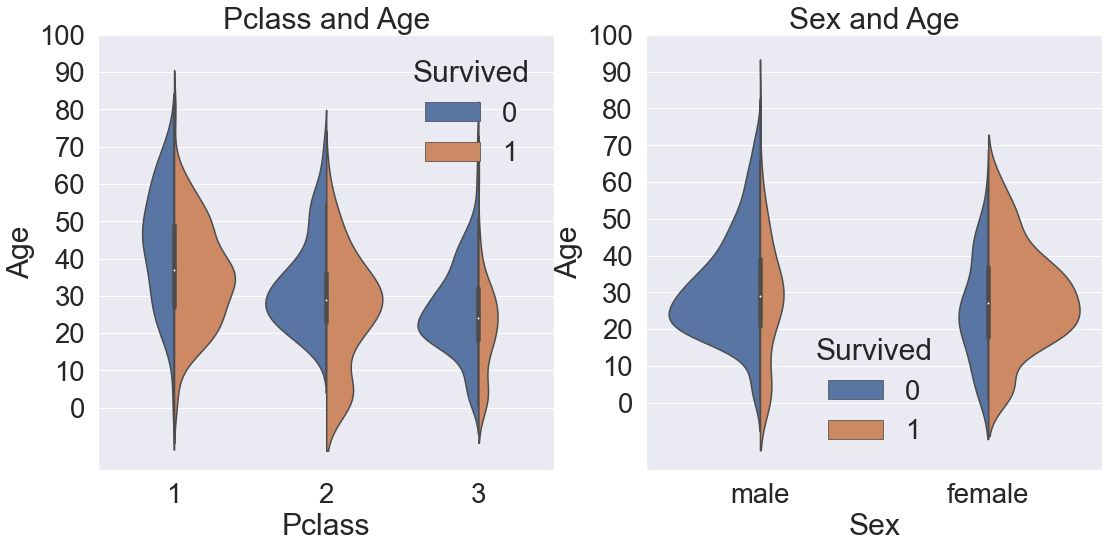

In [253]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = train,
              scale = "count", split = True, ax = ax[0])
ax[0].set_title("Pclass and Age")
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = train,
              scale = "count", split = True, ax = ax[1])
ax[1].set_title("Sex and Age")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 2.6 Embarked

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

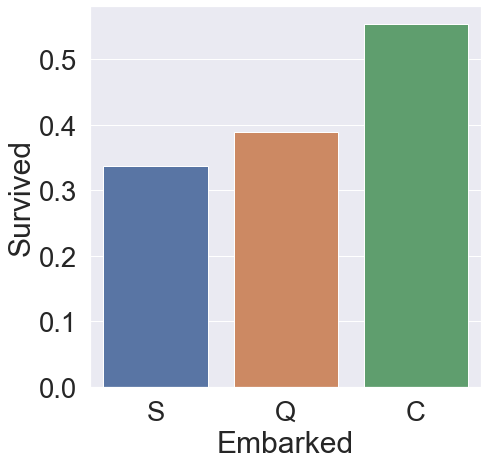

In [254]:
embarked_df = train[["Embarked", "Survived"]].groupby("Embarked").agg("mean").sort_values(
    by = "Survived")
plt.figure(figsize = (7,7))
sns.barplot(data = embarked_df, x = embarked_df.index, y = "Survived")

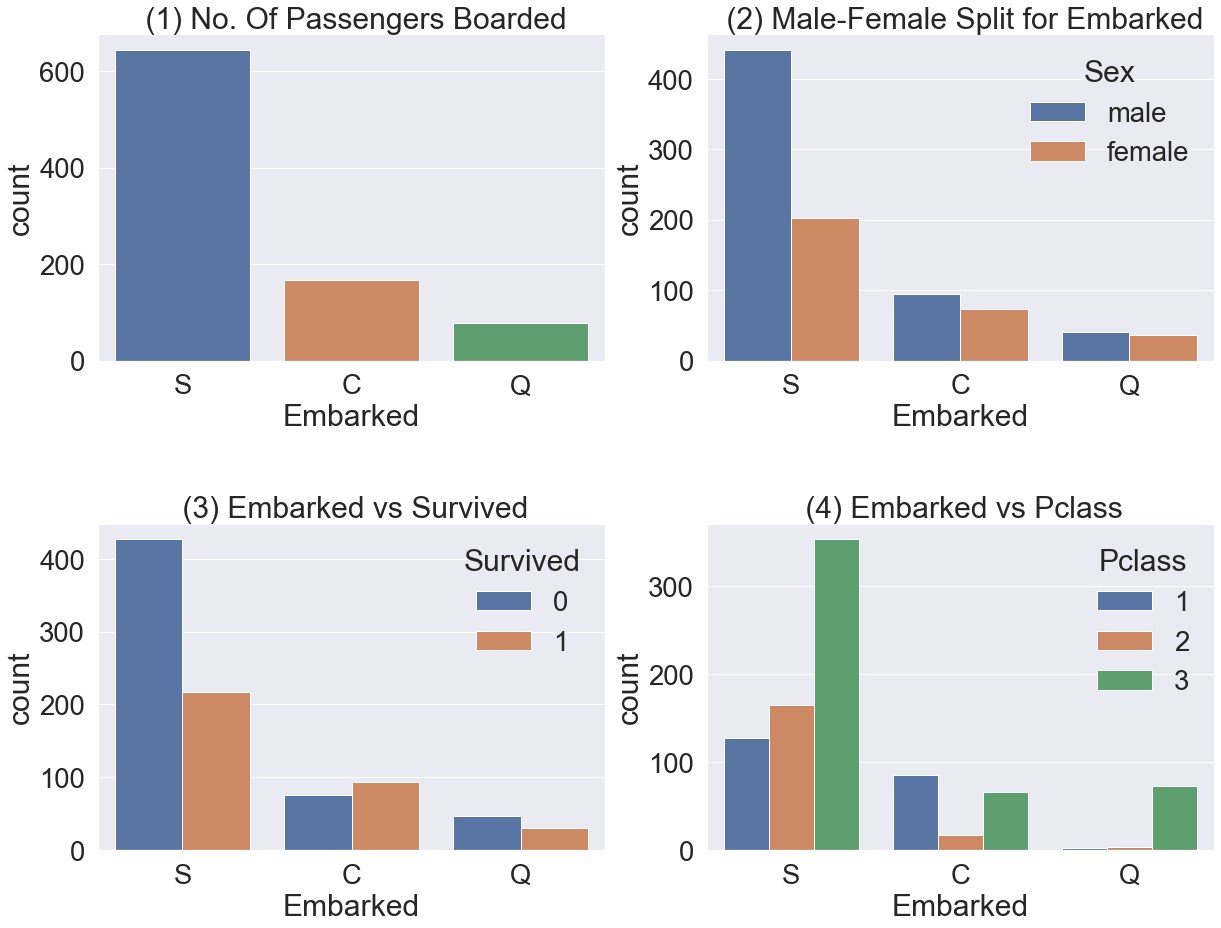

In [255]:
# fig.tight_layout() : 서브 플롯간에 올바른 간격 자동 유지
# plt.subplots_adjust() : 서브 플롯 간 간격을 변경
fig, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot("Embarked", data = train, ax = ax[0,0])
ax[0,0].set_title(" (1) No. Of Passengers Boarded")
sns.countplot("Embarked", hue = "Sex", data = train, ax = ax[0,1])
ax[0,1].set_title(" (2) Male-Female Split for Embarked")
sns.countplot("Embarked", hue = "Survived", data = train, ax = ax[1,0])
ax[1,0].set_title(" (3) Embarked vs Survived")
sns.countplot("Embarked", hue = "Pclass", data = train, ax = ax[1,1])
ax[1,1].set_title(" (4) Embarked vs Pclass")
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
# fig.tight_layout()
plt.show()

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [256]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [257]:
print("Maximum size of Family : ", train["FamilySize"].max())
print("Minimum size of Family : ", train["FamilySize"].min())

Maximum size of Family :  11
Minimum size of Family :  1


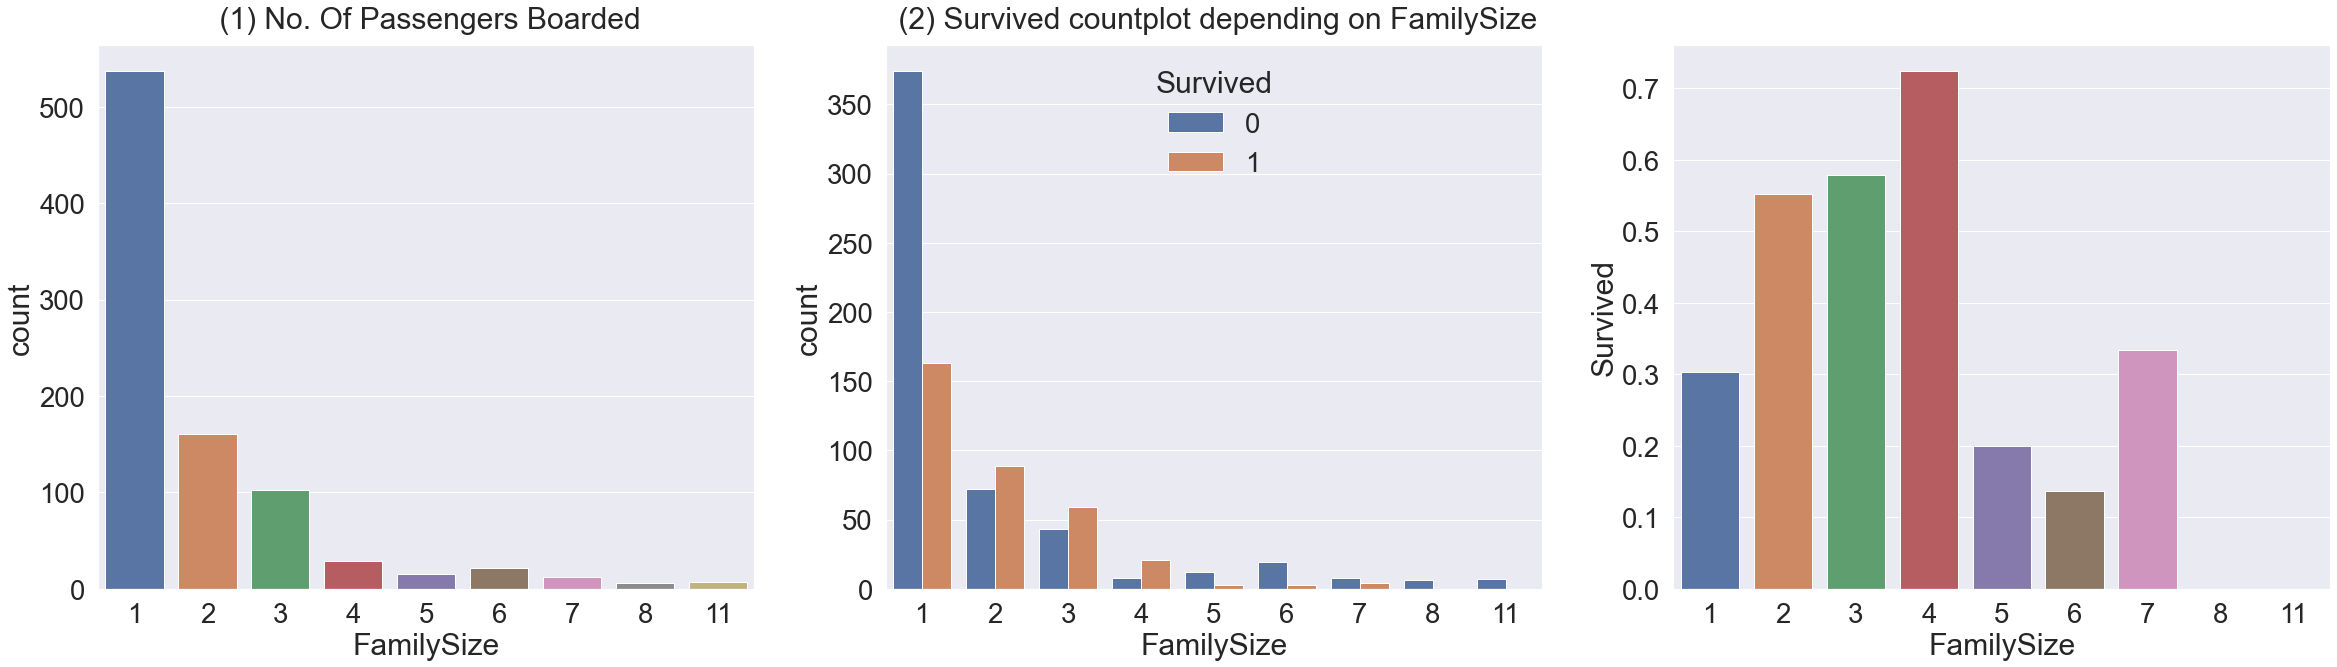

In [258]:
fig, ax = plt.subplots(1, 3, figsize = (40,10))
sns.countplot("FamilySize", data = train, ax = ax[0])
ax[0].set_title(" (1) No. Of Passengers Boarded", y = 1.02)

sns.countplot("FamilySize", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title(" (2) Survived countplot depending on FamilySize", y = 1.02)

size_count_df = train[["FamilySize", "Survived"]].groupby("FamilySize", as_index = False).agg("mean").sort_values(by = "Survived", ascending = False)
sns.barplot(data = size_count_df, x = "FamilySize", y = "Survived")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare

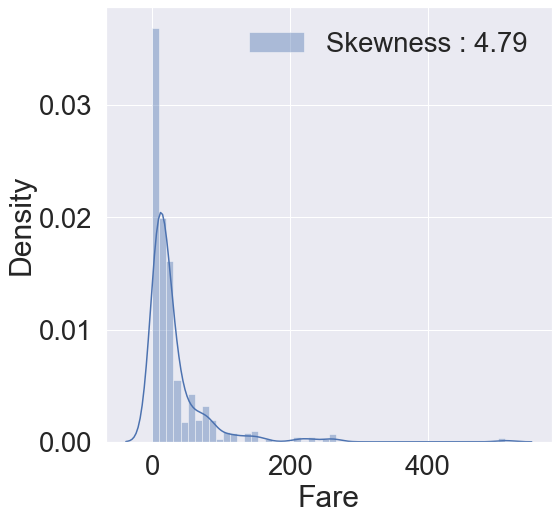

In [259]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
sns.distplot(train["Fare"], color = "b", label = "Skewness : {:.2f}".format(train["Fare"].skew()),
            ax=ax)
ax.legend(loc = "best")

In [260]:
test.loc[test.Fare.isnull(), "Fare"] = test["Fare"].mean()

train["Fare"] = train["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)
test["Fare"] = test["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)

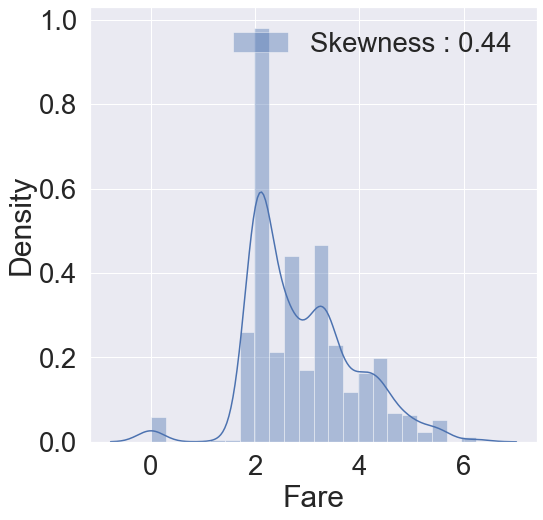

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
ax.legend(loc='best')

## 3. Feature engineering  
### 3.1 Fill Null
#### 3.1.1 Fill Null Age using title

In [262]:
import re

- 파이썬이 역슬래시를 리터럴로 번역하는 경우도 있지만 그렇지 않은 경우도 있기 때문에 항상 원시 문자열을 사용하는 습관을 들이지 않는다면, 여러분의 코드는 신뢰하기가 어렵고 예측하기도 어려워진다. 그러니 정규표현식 지시 문자열 맨 앞에는 r을 항상 넣는 것이 좋다.     


- [ -] : 빈칸 혹은 빼기 기호와 일치하는지 확인, 둘중 하나만 나타나야 한다.    
    * 문자 개수는 정규표현식 패턴으로 표현할 때 특별한 의미를 가지고 있다. 이 방법들을 모두 숙지하는 것이 좋다. 특히 +나 *와 같은 표현식은 구두점 문자도 포함한다.
    * 특별한 의미를 지니고 있지 않은 모든 문자는 파이썬 정규표현식 번역기에서 리터럴 문자로 인식한다. 정규표현식 번역기는 이 문자들이 정확하게 일치하는지 확인한다.
    * 역슬래시 기호는 보통 '이스케이프(escape)'특수 문자에 사용되며, 특수 문자를 리터럴 문자로 만든다. 역슬래시는 원래 문자에 특별한 의미를 부여하기 위해서도 사용된다. 가령 \d는 'd'를 의미하는 것이 아니라 '모든 숫자'를 의미한다.
    
- 정규표현식 : 기본 문법 요약
    * 메타 문자(meta characters) : 특수 문자나 문자의 숫자를 제어하는 문자(가령 '모든 숫자' 혹은 '모든 문자숫자식(alpanumeric)')를 위한 도구다. 각 문자는 한 번에 하나의 문자와 일치한다.
    * 문자 집합(character sets) : 이 문법도 한 번에 하나의 문자와 일치한다. 이 경우는 일치 대상 값의 집합이 주어진다.
    * 표현식 수량자(expression quantifiers) : 이 연산자는 각 문자를 조합할 수 있게 해 준다. 가령 와일드카드(wildcard, *)는 표현식 패턴을 계속 반복할 수 있다.
    * 그룹(groups) : 소괄호 기호를 사용하면 작은 표현식을 큰 표현식과 조합할 수 있다.
    
    
| 특수문자 | 이름 / 설명 |
| -------------| ------------- |
| . | 점 기호. 개행 문자를 제외한 임의의 문자 하나와 일치한다. DOTALL 플래그가 주어지면 모든 문자와 일치할 수 있다. |
| ^ | 캐럿 기호. 문자열의 시작을 의미한다. MULTILINE 플래그가 주어지면 줄의 시작을 의미할 수 있다(개행 문자 뒤의 모든 문자). |
| $ | 문자열의 끝을 의미한다. MULTILINE 플래그가 주어지면 줄의 끝을 의미한다(개행 문자 혹은 문자열 끝에서 바로 앞에 위치한 마지막 문자). |
| \A | 문자열의 시작을 의미한다. |
| \b | 단어의 경계. 예를 들어 r'ish\b'는 'ish is'와 'ish)'와 일치하지만 'ishmael'과는 일치하지 않는다. |
| \B | 비단어(nonword)의 경계. 이 지점에서 새로운 단어가 시작되지 않는 경우에만 일치한다. 예를 들어 r'al\B'는 'always'와 일치하지만 'al '과는 일치하지 않는다. |
| \d | 모든 숫자. 0부터 9까지의 숫자를 포함한다. UNICODE 플래그가 설정되면 숫자로 분류된 유니코드 문자도 포함된다. |
| \s | 모든 여백(whitespace) 문자. 빈칸이나 \t. \n. \r. \f. \v 등이 포한된다. UNICODE와 LOCALE 플래그가 설정되면 여백 문자 판단 기준이 변경될 수도 있다.
| \S | 위에서 정의한 여백 문자가 아닌 모든 문자 |
| \w | 모든 문자숫자식 문자 (글자 혹은 숫자) 혹은 언더스코어 기호(_)와 일치한다. UNICODE와 LOCALE 플래그가 설정되면 문자숫자식 판단 기준이 변경될 수도 있다. |
| \W | 위에서 정의한 문자숫자식 문자를 제외한 모든 문자 |
| \z | 문자열 끝을 의미한다. |

In [263]:
if re.match("m*ack", "Mack the Knife", re.I | re.DEBUG):
    print("Success.")

MAX_REPEAT 0 MAXREPEAT
  LITERAL 109
LITERAL 97
LITERAL 99
LITERAL 107

 0. INFO 4 0b0 3 MAXREPEAT (to 5)
 5: REPEAT_ONE 6 0 MAXREPEAT (to 12)
 9.   LITERAL_UNI_IGNORE 0x6d ('m')
11.   SUCCESS
12: LITERAL_UNI_IGNORE 0x61 ('a')
14. LITERAL_UNI_IGNORE 0x63 ('c')
16. LITERAL_UNI_IGNORE 0x6b ('k')
18. SUCCESS
Success.


In [264]:
train["Initial"] = train["Name"].apply(lambda x: re.findall("([A-Za-z]+)\.", x)[0])
test["Initial"] = test["Name"].apply(lambda x: re.findall("([A-Za-z]+)\.", x)[0])

In [265]:
train["Name"].apply(lambda x: re.findall(r"([A-Za-z]+)\.", x)[0])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [266]:
# Cheking the Initials with thes Sex
pd.crosstab(train["Initial"], train["Sex"]).T.style.background_gradient(cmap = "summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [267]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [268]:
train.groupby("Initial").agg("mean")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [269]:
train.groupby("Initial", as_index=False)["Survived"].mean().sort_values(by = "Survived")

,Initial,Survived
4,Other,0.111111
2,Mr,0.162571
0,Master,0.575000
1,Miss,0.704301
3,Mrs,0.795276


<AxesSubplot:xlabel='Initial', ylabel='Survived'>

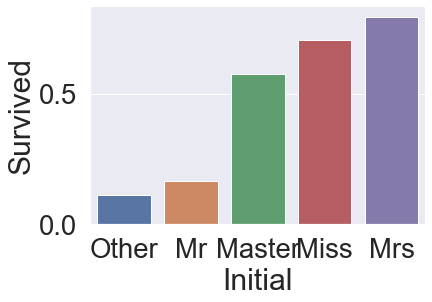

In [270]:
sns.barplot(x = "Initial", y = "Survived", data = train.groupby("Initial", as_index=False)["Survived"].mean().sort_values(by = "Survived"))

In [271]:
train.loc[(train["Age"].isnull()) & (train["Initial"] == "Mr"), "Age"] = 33
train.loc[(train["Age"].isnull()) & (train["Initial"] == "Mrs"), "Age"] = 36
train.loc[(train["Age"].isnull()) & (train["Initial"] == "Mastr"), "Age"] = 5
train.loc[(train["Age"].isnull()) & (train["Initial"] == "Miss"), "Age"] = 22
train.loc[(train["Age"].isnull()) & (train["Initial"] == "Other"), "Age"] = 46

test.loc[(test["Age"].isnull()) & (test["Initial"] == "Mr"), "Age"] = 33
test.loc[(test["Age"].isnull()) & (test["Initial"] == "Mrs"), "Age"] = 36
test.loc[(test["Age"].isnull()) & (test["Initial"] == "Mastr"), "Age"] = 5
test.loc[(test["Age"].isnull()) & (test["Initial"] == "Miss"), "Age"] = 22
test.loc[(test["Age"].isnull()) & (test["Initial"] == "Other"), "Age"] = 46

#### 3.1.2 Fill Null in Embarked

In [272]:
print("Emanrked has ", train["Embarked"].isnull().sum(), " Null Values")

Emanrked has  2  Null Values


In [273]:
train["Embarked"].fillna("S", inplace = True)

### 3.2 Change Age(continuous to categorical)

In [274]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
train['Age_cat'] = train['Age'].apply(category_age)
test['Age_cat'] = test['Age'].apply(category_age)

In [275]:
train.drop(["Age"], axis = 1, inplace = True)
test.drop(["Age"], axis = 1, inplace = True)

### 3.3 Change Initial, Emarked and Sex(string to numerical)

In [276]:
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [277]:
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [278]:
train["Embarked"].isnull().any()

False

In [279]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

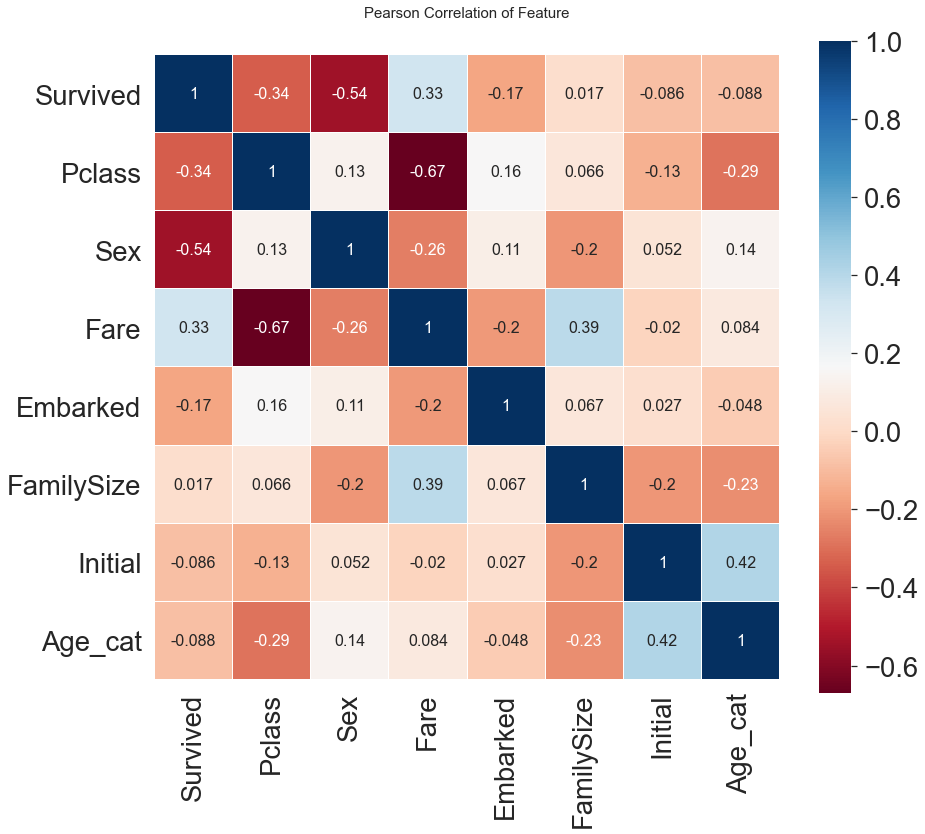

In [280]:
heatmap_data = train[["Survived", "Pclass", "Sex", "Fare",
                     "Embarked", "FamilySize", "Initial", "Age_cat"]]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title("Pearson Correlation of Feature", y= 1.05, size= 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", 
           annot = True, annot_kws = {"size" : 16})

del heatmap_data

In [231]:
# 범주형 변수들끼리의 상관성은 카이제곱 검정을 통해 확인한다.
from scipy.stats import chi2_contingency

# chi2_contigency(observed = pd.crosstab, correction = False)
# correction = True를 적용하면 Yates' correction이 적용되어 검정통계량이 보수적으로 더 낮게 나옴
def chi2_func(df, col1, col2):
    df_crosstab = pd.crosstab(df[col1], df[col2], margins = False)
    result = chi2_contingency(observed = df_crosstab, correction = False)
    
    print("1. 카이제곱 통계량:", result[0])
    print("2. p-value:", result[1])
    print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
    print(pd.DataFrame(result[3]))
    
    if result[1] < 0.05:
        print(f"{col1}, {col2}는 상관이 있다.")

In [284]:
col_lst = ["Pclass", "Sex", "FamilySize", "Initial", "Age_cat"]

In [286]:
for idx in col_lst:
    chi2_func(train, "Survived", idx)
    print("\n")

1. 카이제곱 통계량: 102.88898875696056
2. p-value: 4.549251711298793e-23
3. df: 2
            0           1           2
0  133.090909  113.373737  302.535354
1   82.909091   70.626263  188.464646
Survived, Pclass는 상관이 있다.


1. 카이제곱 통계량: 263.05057407065567
2. p-value: 3.711747770113424e-59
3. df: 1
            0           1
0  193.474747  355.525253
1  120.525253  221.474747
Survived, Sex는 상관이 있다.


1. 카이제곱 통계량: 80.67231343783078
2. p-value: 3.579668975443533e-14
3. df: 8
            0         1          2          3         4          5         6  \
0  330.878788  99.20202  62.848485  17.868687  9.242424  13.555556  7.393939   
1  206.121212  61.79798  39.151515  11.131313  5.757576   8.444444  4.606061   

         7         8  
0  3.69697  4.313131  
1  2.30303  2.686869  
Survived, FamilySize는 상관이 있다.


1. 카이제곱 통계량: 290.1855207640608
2. p-value: 1.4178931258807962e-61
3. df: 4
           0           1           2          3         4
0  24.646465  114.606061  325.949495  78.252525  5.54545

### 3.4 One-hot encoding on Initial and Embarked

In [174]:
train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')

In [175]:
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

In [182]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

### 4. Building machin learning model and prediction using the trained model

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1 Preparation - Split dataset into train, valid, test set

In [183]:
x_train = train.drop("Survived", axis = 1).values
traget_label = train["Survived"].values
x_test = test.values

In [184]:
x_train, x_val, y_train, y_val = train_test_split(x_train, traget_label,
                                                 test_size = 0.3, random_state = 2018)

### 4.2 Model generation and prediction

In [185]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_val)

In [186]:
print("총 {}명 중 {:.2f}% 정확도로 생존을 맞춤".format(y_val.shape[0], 100 * metrics.accuracy_score(prediction, y_val)))

총 268명 중 83.58% 정확도로 생존을 맞춤


### 4.3 Feature importance

In [187]:
feature_importance = model.feature_importances_

In [194]:
feature_importance_df = pd.DataFrame({"col":test.columns,
    "value":feature_importance})

In [200]:
feature_importance_df.sort_values(by = "value", inplace = True, ascending = False)

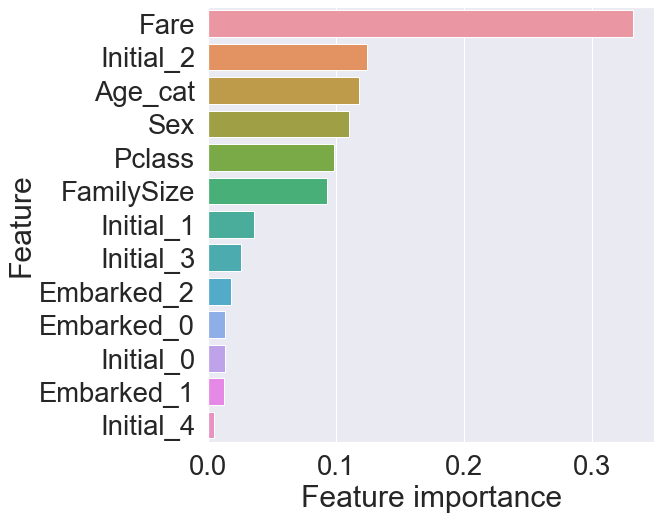

In [202]:
plt.figure(figsize = (8, 8))
sns.barplot(x = "value", y = "col", data = feature_importance_df)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [203]:
submission = pd.read_csv("../data/gender_submission.csv")

In [204]:
prediction = model.predict(x_test)
submission["Survived"] = prediction

In [205]:
submission.to_csv("../data/firt_submission.csv",
                 index = False)